Project checkpoint 1 (15%): For this milestone, you will need to have downloaded the data, and
also run some initial pre-processing on it. You should also make at least one dummy submission
(all-positive, all-negative, most-frequency) on Kaggle and submit the Jupyter Notebook including
the code and a screenshot of the score on Canvas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv("train.csv")
y_train = pd.read_csv("train_labels.csv")

In [3]:
X_train.head()

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
0         0       47     0  -0.196291   0.112395        1.0   0.329204   
1         0       47     1  -0.447450   0.134454        1.0  -0.658407   
2         0       47     2   0.326893  -0.694328        1.0   0.330088   
3         0       47     3   0.523184   0.751050        1.0   0.976991   
4         0       47     4   0.272025   1.074580        1.0  -0.136283   

   sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0  -1.004660  -0.131638  -0.127505   0.368702       -0.1  -0.963873   
1   0.162495   0.340314  -0.209472  -0.867176        0.2  -0.301301   
2   0.473678   1.280479  -0.094718   0.535878        1.4   1.002168   
3  -0.563287  -0.720269   0.793260   0.951145       -0.3  -0.995665   
4   0.398579   0.044877   0.560109  -0.541985       -0.9   1.055636   

   sensor_10  sensor_11  sensor_12  
0  -0.985069   0.531893   4.751492  
1   0.082733  -0.231481   0.454390  
2   0.449221  -0.586420  -4.736147  
3  -0.434290   1.344650   0.429241  
4   0.812631   0.123457  -0.223359

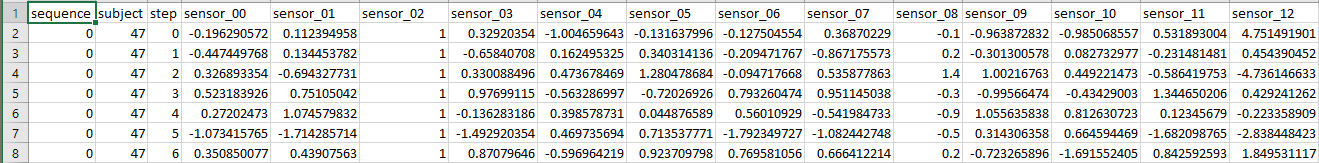

In [4]:
X_train = X_train.groupby(['sequence']).mean()
y_train = y_train.drop(columns=['sequence'])

In [5]:
dt = DecisionTreeClassifier()
# dt = DummyClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
X_test = pd.read_csv("test.csv")
X_test = X_test.groupby(['sequence']).mean()
# X_test

predict = dt.predict(X_test)

In [6]:
# predict = dt.predict(X_train)

In [19]:
predict_df = pd.DataFrame(predict,columns=['state'])
predict_df

state
0          1
1          0
2          1
3          1
4          0
...      ...
12213      1
12214      0
12215      0
12216      0
12217      0

[12218 rows x 1 columns]

In [20]:
predict
predict_df = pd.DataFrame(predict,columns=['state'])
predict_df

state
0          1
1          0
2          1
3          1
4          0
...      ...
12213      1
12214      0
12215      0
12216      0
12217      0

[12218 rows x 1 columns]

In [21]:
list = []
i = 1
while i < 12219:
    list.append(25967+i)
    i += 1

In [22]:
col = np.array(list)
col_df = pd.DataFrame(col,columns=['sequence'])
col_df

sequence
0         25968
1         25969
2         25970
3         25971
4         25972
...         ...
12213     38181
12214     38182
12215     38183
12216     38184
12217     38185

[12218 rows x 1 columns]

In [23]:
# final_df = col_df.append(predict_df)
final_df = pd.concat([col_df,predict_df],ignore_index=True, sort=False,axis=1)
# df_merged = pd.concat([df1, df2], ignore_index=True, sort=False)

In [24]:
final_df

0  1
0      25968  1
1      25969  0
2      25970  1
3      25971  1
4      25972  0
...      ... ..
12213  38181  1
12214  38182  0
12215  38183  0
12216  38184  0
12217  38185  0

[12218 rows x 2 columns]

In [26]:
final_df.to_csv("checkpoint_1.csv",index=False)

In [14]:
cv_scores = cross_val_score(dt,X_train,y_train,cv=10)
# cv_scores